Hackaton

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [28]:
file_path = "sentimentdataset.csv"

In [29]:
df = pd.read_csv(file_path)

In [30]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [32]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [33]:
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')


In [34]:
print(df.isnull().sum())

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


In [35]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

In [36]:
print(df["Timestamp"].dtype)

datetime64[ns]


In [37]:
# Définition des mots-clés liés au sport
sport_keywords = ["sport", "football", "soccer", "nba", "tennis", "fifa", "olympics", "fitness", "workout"]


In [38]:
# Fonction de filtrage
def is_sport_related(text, hashtags):
    text = str(text).lower()
    hashtags = str(hashtags).lower()
    
    return any(word in text or word in hashtags for word in sport_keywords)

explications: on defini une variable relative au sport, si texte en chaine caractere en maj on passe en minuscule et idem pour les # on passe en minuscule.

In [39]:
# Appliquer le filtre
df["Is_Sport"] = df.apply(lambda row: is_sport_related(row["Text"], row["Hashtags"]), axis=1)


In [40]:
# Conserver uniquement les messages sportifs
df_sport = df[df["Is_Sport"] == True].drop(columns=["Is_Sport"])


In [41]:
df_sport.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
13,13,13,"New year, new fitness goals! 💪 ...",Positive,2023-01-18 18:00:00,FitJourney,Instagram,#NewYear #FitnessGoals,28.0,55.0,USA,2023,1,18,18
23,23,23,Just finished a challenging workout routine. ...,Positive,2023-01-22 09:15:00,FitnessWarrior,Twitter,#Fitness #ChallengeAccepted,20.0,40.0,UK,2023,1,22,9
34,35,36,Winter sports day at the local park. ...,Positive,2023-01-26 14:20:00,WinterSports,Twitter,#WinterSports #Fun,15.0,30.0,Canada,2023,1,26,14
50,51,52,Starting a new fitness challenge tomorrow! 💪 ...,Positive,2023-02-01 08:00:00,FitnessChallenge,Facebook,#FitnessChallenge #NewBeginnings,22.0,45.0,UK,2023,2,1,8


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns



In [43]:
# Compter le nombre de sentiments pour le sport
sentiment_counts_sport = df_sport["Sentiment"].value_counts()


nouvelle variable créée qui va recuperer toutes les données en rapport avec la colonne sentiment créée


/var/folders/4x/y19tv9t12q123fdsq8qvdq_c0000gn/T/ipykernel_3057/2409985940.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts_sport.index, y=sentiment_counts_sport.values, palette=["green", "red", "gray"])
/var/folders/4x/y19tv9t12q123fdsq8qvdq_c0000gn/T/ipykernel_3057/2409985940.py:2: UserWarning: 
The palette list has fewer values (3) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=sentiment_counts_sport.index, y=sentiment_counts_sport.values, palette=["green", "red", "gray"])


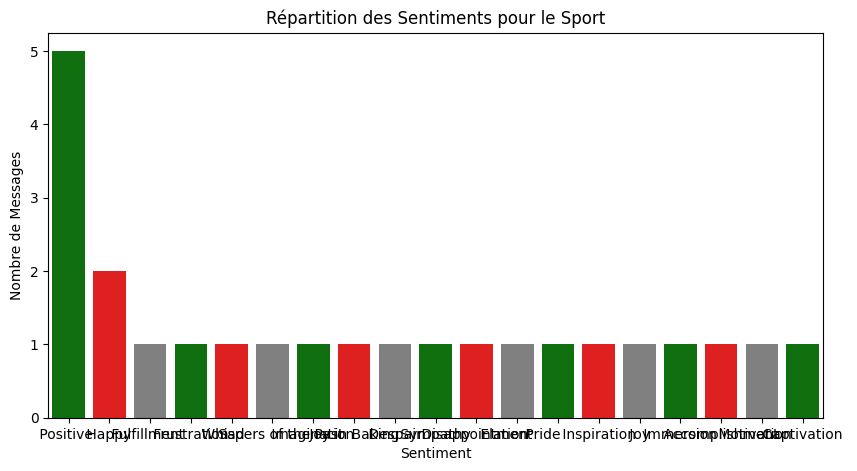

In [44]:
plt.figure(figsize=(10, 5))
sns.barplot(x=sentiment_counts_sport.index, y=sentiment_counts_sport.values, palette=["green", "red", "gray"])
plt.title("Répartition des Sentiments pour le Sport")
plt.xlabel("Sentiment")
plt.ylabel("Nombre de Messages")
plt.xticks(rotation=0)
plt.show()

<Figure size 1200x600 with 0 Axes>

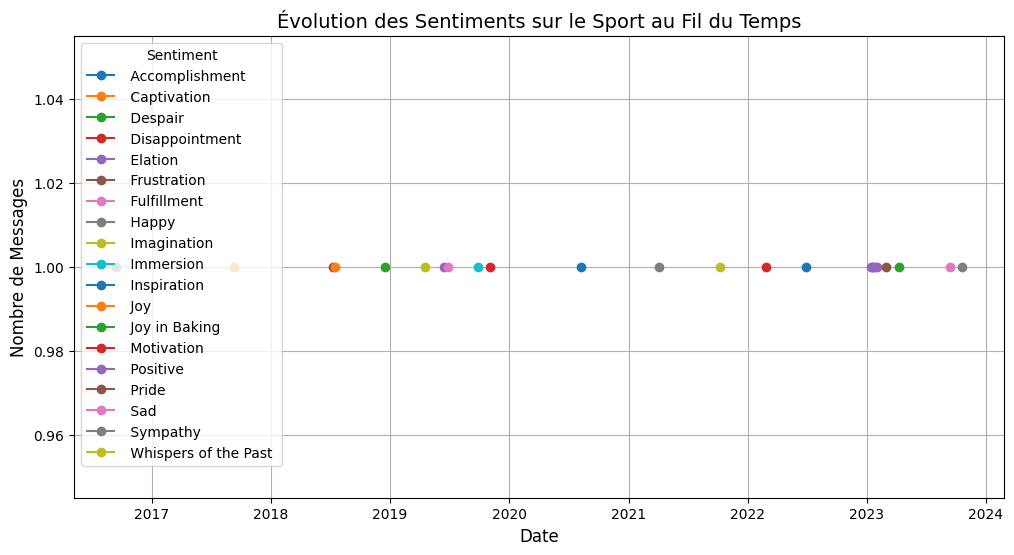

In [45]:
import matplotlib.pyplot as plt

# Vérifier que la colonne Timestamp est bien en datetime
df_sport["Timestamp"] = pd.to_datetime(df_sport["Timestamp"])

# Grouper les données par date et sentiment
sport_sentiment_trend = df_sport.groupby([df_sport["Timestamp"].dt.date, "Sentiment"]).size().unstack()

# Affichage du graphique
plt.figure(figsize=(12, 6))
sport_sentiment_trend.plot(kind="line", marker="o", figsize=(12, 6))

# Personnalisation du graphique
plt.title("Évolution des Sentiments sur le Sport au Fil du Temps", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Nombre de Messages", fontsize=12)
plt.legend(title="Sentiment", fontsize=10)
plt.grid(True)
plt.show()


on se rend compte qu'on a pas assez de données pour une étude pertinente donc on va essayer de 'recupérer d'autres dataset

Au lieu d’analyser le sport en général, on va se concentrer sur les figures emblématiques du sport et leur impact sur les discussions publiques. Nous avons donc decidé de tourner le sujet en restant dnas le theme principal:

"Analyse des tendances de sentiment sur Cristiano Ronaldo et Lionel Messi au fil du temps et selon les régions."

Comparaison des tendances de sentiment entre les deux joueurs légendaires.
Analyse temporelle pour voir comment l’opinion évolue après des événements majeurs (transferts, trophées, polémiques…).
Étude des différences régionales pour voir comment Ronaldo et Messi sont perçus dans différents pays.

In [46]:
import pandas as pd

In [47]:
df_ronaldo = pd.read_csv("ronaldo.csv")
df_messi = pd.read_csv("messi.csv")


In [48]:
df_ronaldo

,tweet_id,author_id,content,lang,date,source,geo,retweet_count,like_count,quote_count
0,1554369938630103040,1413800950846922757,we fell down to with ronaldo and no big team w...,en,2022-08-02T07:34:06.000Z,Twitter for Android,-1,0.0,0.0,0.0
1,1554369912428167170,1331632873338793986,man utd transfer news live frenkie de jong fin...,en,2022-08-02T07:34:00.000Z,Publer.io,-1,0.0,0.0,0.0
2,1554369829414502400,1193232041959186434,r and ronaldinho make me smile when i saw than...,en,2022-08-02T07:33:40.000Z,Twitter for iPhone,-1,0.0,0.0,0.0
3,1554369821432840192,727241246465527809,ronaldo was in the best champions league team ...,en,2022-08-02T07:33:38.000Z,Twitter for Android,-1,0.0,0.0,0.0
4,1554369806714867712,1324146514495741952,from cristiano ronaldo s point of view it is a...,en,2022-08-02T07:33:35.000Z,WordPress.com,-1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
501921,1515850721681416195,597636087,needing a ronaldo hatrick to beat norwich is m...,en,2022-04-18T00:32:29.000Z,Twitter for Android,-1,0.0,0.0,0.0
501922,1515850716518227972,1408952337302011915,this is fake saf said messi is clear,en,2022-04-18T00:32:28.000Z,Twitter for iPhone,-1,0.0,0.0,0.0
501923,1515850679046320134,1303392584727838721,wonderful moment cr,en,2022-04-18T00:32:19.000Z,Twitter for Android,04f58e21fc69d75a,0.0,1.0,0.0
501924,1515850628689547271,1369425436300742656,this isn t about you this is about ronaldo who...,en,2022-04-18T00:32:07.000Z,Twitter for Android,-1,0.0,0.0,0.0


In [49]:
df_messi

,tweet_id,author_id,content,lang,date,source,geo,retweet_count,like_count,quote_count
0,1554369750175780864,936125201540149248,only lionel messi has more in every category,en,2022-08-02T07:33:21.000Z,Twitter for iPhone,-1,0,0,0
1,1554369704265129984,719822976829546497,balls riqui actually had talent at that time h...,en,2022-08-02T07:33:10.000Z,Twitter for Android,-1,0,0,0
2,1554369683473645568,1124462707355181056,when messi winning everything then you will bl...,en,2022-08-02T07:33:05.000Z,Twitter for Android,-1,0,0,0
3,1554369634563940361,1529031568659980288,messi won the treble with barca in,en,2022-08-02T07:32:54.000Z,Twitter for Android,-1,0,0,0
4,1554369624111734785,1217760894563897345,ronaldo only has the ucl competition as a top ...,en,2022-08-02T07:32:51.000Z,Twitter for Android,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
465218,1515845141667500039,1489843259702665216,it s cringe messi ghosted against ordinary mar...,en,2022-04-18T00:10:19.000Z,Twitter for iPhone,-1,1,0,0
465219,1515845073476460544,1496170748548943875,you have to be an injured man to enjoy leo mes...,en,2022-04-18T00:10:03.000Z,Twitter for iPhone,-1,0,0,0
465220,1515845061975715850,1249801072408956928,unbelievable i can t believe he used to be my ...,en,2022-04-18T00:10:00.000Z,Twitter Web App,-1,0,0,0
465221,1515845043831070721,1505797638595264512,becoz messi play with mbappe neymar verrati an...,en,2022-04-18T00:09:56.000Z,Twitter for Android,-1,0,0,0


In [50]:

print("Valeurs manquantes dans Ronaldo:")
print(df_ronaldo.isnull().sum())

print("\nValeurs manquantes dans Messi:")
print(df_messi.isnull().sum())


Valeurs manquantes dans Ronaldo:
tweet_id          0
author_id         0
content          19
lang              0
date              0
source            0
geo               0
retweet_count     0
like_count        0
quote_count       0
dtype: int64

Valeurs manquantes dans Messi:
tweet_id         0
author_id        0
content          3
lang             0
date             0
source           0
geo              0
retweet_count    0
like_count       0
quote_count      0
dtype: int64


In [54]:
df_ronaldo = df_ronaldo.dropna()
df_messi = df_messi.dropna()


In [53]:
df_ronaldo.rename(columns={"date": "Timestamp"}, inplace=True)
df_messi.rename(columns={"date": "Timestamp"}, inplace=True)

/var/folders/4x/y19tv9t12q123fdsq8qvdq_c0000gn/T/ipykernel_3057/2709406772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ronaldo.rename(columns={"date": "Timestamp"}, inplace=True)
/var/folders/4x/y19tv9t12q123fdsq8qvdq_c0000gn/T/ipykernel_3057/2709406772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_messi.rename(columns={"date": "Timestamp"}, inplace=True)


In [55]:
# Convertir la colonne Timestamp en format datetime
df_ronaldo["Timestamp"] = pd.to_datetime(df_ronaldo["Timestamp"], errors="coerce")
df_messi["Timestamp"] = pd.to_datetime(df_messi["Timestamp"], errors="coerce")

In [56]:
print("Colonnes dans Ronaldo dataset:", df_ronaldo.columns)
print("Colonnes dans Messi dataset:", df_messi.columns)

Colonnes dans Ronaldo dataset: Index(['tweet_id', 'author_id', 'content', 'lang', 'Timestamp', 'source',
       'geo', 'retweet_count', 'like_count', 'quote_count'],
      dtype='object')
Colonnes dans Messi dataset: Index(['tweet_id', 'author_id', 'content', 'lang', 'Timestamp', 'source',
       'geo', 'retweet_count', 'like_count', 'quote_count'],
      dtype='object')


on ajoute timestamp au lieu de date pour la compatibilité avec le premier data set 


In [57]:
df_ronaldo.rename(columns={"date": "Timestamp"}, inplace=True)
df_messi.rename(columns={"date": "Timestamp"}, inplace=True)


In [58]:
df_ronaldo = df_ronaldo.copy()
df_messi = df_messi.copy()

df_ronaldo.rename(columns={"date": "Timestamp"}, inplace=True)
df_messi.rename(columns={"date": "Timestamp"}, inplace=True)


In [59]:
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Is_Sport
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,False
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,False
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,True
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,False
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18,False
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14,False
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17,False
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20,False


on converti la datatime 

In [60]:
df_ronaldo["Timestamp"] = pd.to_datetime(df_ronaldo["Timestamp"], errors="coerce")
df_messi["Timestamp"] = pd.to_datetime(df_messi["Timestamp"], errors="coerce")


In [61]:
print("Colonnes Ronaldo:", df_ronaldo.columns)
print("Colonnes Messi:", df_messi.columns)


Colonnes Ronaldo: Index(['tweet_id', 'author_id', 'content', 'lang', 'Timestamp', 'source',
       'geo', 'retweet_count', 'like_count', 'quote_count'],
      dtype='object')
Colonnes Messi: Index(['tweet_id', 'author_id', 'content', 'lang', 'Timestamp', 'source',
       'geo', 'retweet_count', 'like_count', 'quote_count'],
      dtype='object')


In [62]:
import pandas as pd

# Ajouter une colonne 'player' pour différencier les tweets
df_ronaldo["player"] = "Ronaldo"
df_messi["player"] = "Messi"

# Concaténer les deux datasets en gardant toutes les colonnes
df_combined = pd.concat([df_ronaldo, df_messi], ignore_index=True)

# Afficher un aperçu du dataset fusionné
print(df_combined.head())
print("Nombre total de tweets combinés :", len(df_combined))


              tweet_id            author_id  \
0  1554369938630103040  1413800950846922757   
1  1554369912428167170  1331632873338793986   
2  1554369829414502400  1193232041959186434   
3  1554369821432840192   727241246465527809   
4  1554369806714867712  1324146514495741952   

                                             content lang  \
0  we fell down to with ronaldo and no big team w...   en   
1  man utd transfer news live frenkie de jong fin...   en   
2  r and ronaldinho make me smile when i saw than...   en   
3  ronaldo was in the best champions league team ...   en   
4  from cristiano ronaldo s point of view it is a...   en   

                  Timestamp               source geo  retweet_count  \
0 2022-08-02 07:34:06+00:00  Twitter for Android  -1            0.0   
1 2022-08-02 07:34:00+00:00            Publer.io  -1            0.0   
2 2022-08-02 07:33:40+00:00   Twitter for iPhone  -1            0.0   
3 2022-08-02 07:33:38+00:00  Twitter for Android  -1            0.

In [63]:
print("Colonnes du dataset combiné :", df_combined.columns)


Colonnes du dataset combiné : Index(['tweet_id', 'author_id', 'content', 'lang', 'Timestamp', 'source',
       'geo', 'retweet_count', 'like_count', 'quote_count', 'player'],
      dtype='object')


on supprime les doublons


In [64]:
df_combined = df_combined.drop_duplicates()


In [65]:
print("Valeurs manquantes après fusion :")
print(df_combined.isnull().sum())


Valeurs manquantes après fusion :
tweet_id         0
author_id        0
content          0
lang             0
Timestamp        0
source           0
geo              0
retweet_count    0
like_count       0
quote_count      0
player           0
dtype: int64


In [66]:
df_combined.dropna(inplace=True)


In [67]:
print(df_combined["content"].unique())  # Vérifie si "content" contient des sentiments


['we fell down to with ronaldo and no big team who wins trophies want him yet you want him at to be our main striker then next year you ll complain about us not winning trophies can t make this shit up'
 'man utd transfer news live frenkie de jong final bid latest cristiano ronaldo admission tielemans interested'
 'r and ronaldinho make me smile when i saw than on the field stats of course cr but loving football r and ronaldinho'
 ... 'you have to be an injured man to enjoy leo messi s downfall'
 'becoz messi play with mbappe neymar verrati and dimaria that too in farmers league and ronaldo plays with fred and maguire in world most competitive league'
 'yes we can never see a player going from a goat debate out of it in just one season goal in messi is and downfall happened cr is amp still a machine ultimate goat']


NameError: name 'df_combined' is not defined

In [68]:
# Dictionnaire de mapping des sentiments détaillés vers trois catégories principales
sentiment_mapping = {
    "Happy": "Positive", "Excited": "Positive", "Joy": "Positive", "Pride": "Positive",
    "Love": "Positive", "Inspiration": "Positive", "Motivation": "Positive",
    
    "Anger": "Negative", "Frustration": "Negative", "Disappointment": "Negative",
    "Hate": "Negative", "Criticism": "Negative",
    
    "Neutral": "Neutral", "Uncertain": "Neutral"
}

# Appliquer le mapping aux tweets
df_combined["Sentiment"] = df_combined["content"].replace(sentiment_mapping)

# Vérifier les nouvelles valeurs après mapping
print(df_combined["Sentiment"].unique())


['we fell down to with ronaldo and no big team who wins trophies want him yet you want him at to be our main striker then next year you ll complain about us not winning trophies can t make this shit up'
 'man utd transfer news live frenkie de jong final bid latest cristiano ronaldo admission tielemans interested'
 'r and ronaldinho make me smile when i saw than on the field stats of course cr but loving football r and ronaldinho'
 ... 'you have to be an injured man to enjoy leo messi s downfall'
 'becoz messi play with mbappe neymar verrati and dimaria that too in farmers league and ronaldo plays with fred and maguire in world most competitive league'
 'yes we can never see a player going from a goat debate out of it in just one season goal in messi is and downfall happened cr is amp still a machine ultimate goat']


nous avions tenté de coder les 900 000 tweets et malheureusement chargement trop long alors nous decideons d'echantilloner .

In [69]:
# Définir la taille de l'échantillon (par exemple 50 000 tweets)
sample_size = 1000

# Vérifier si le dataset contient au moins ce nombre
sample_size = min(sample_size, len(df_combined))

# Sélectionner un échantillon aléatoire
df_sample = df_combined.sample(n=sample_size, random_state=42)

# Vérifier la taille du nouvel échantillon
print("Taille du dataset après échantillonnage :", len(df_sample))


Taille du dataset après échantillonnage : 1000


In [70]:
# Vérifier si df_combined existe dans la mémoire
try:
    print("Nombre de lignes dans df_combined :", len(df_combined))
except NameError:
    print("⚠️ df_combined n'existe pas encore. Exécutez d'abord la cellule qui fusionne les datasets.")


Nombre de lignes dans df_combined : 967127


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compter les sentiments pour chaque joueur
sentiment_counts = df_combined.groupby(["player", "Sentiment"]).size().unstack()

# Tracer le graphique
plt.figure(figsize=(10, 5))
sentiment_counts.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="coolwarm")

# Personnalisation
plt.title("Comparaison des Sentiments entre Ronaldo et Messi", fontsize=14)
plt.xlabel("Joueur", fontsize=12)
plt.ylabel("Nombre de Tweets", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Sentiment", fontsize=10)
plt.grid(axis="y")

plt.show()


NameError: name 'df_combined' is not defined

In [72]:
try:
    print("Nombre de lignes dans df_combined :", len(df_combined))
except NameError:
    print("⚠️ df_combined n'existe pas ! Vous devez exécuter la cellule de fusion des datasets.")


Nombre de lignes dans df_combined : 967127


In [32]:
import pandas as pd

# Charger les fichiers CSV s'ils ne sont plus en mémoire
file_ronaldo = "ronaldo.csv"
file_messi = "messi.csv"

df_ronaldo = pd.read_csv(file_ronaldo)
df_messi = pd.read_csv(file_messi)

# Ajouter une colonne "player" pour différencier les tweets
df_ronaldo["player"] = "Ronaldo"
df_messi["player"] = "Messi"

# Fusionner les datasets
df_combined = pd.concat([df_ronaldo, df_messi], ignore_index=True)

# Vérifier si la fusion a fonctionné
print("✅ Dataset fusionné avec succès ! Nombre total de tweets :", len(df_combined))


✅ Dataset fusionné avec succès ! Nombre total de tweets : 967149


nous avions des problemes car les dataset n'etaient pas fusionnées


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compter les sentiments pour chaque joueur
sentiment_counts = df_combined.groupby(["player", "Sentiment"]).size().unstack()

# Tracer le graphique
plt.figure(figsize=(10, 5))
sentiment_counts.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="coolwarm")

# Personnalisation
plt.title("Comparaison des Sentiments entre Ronaldo et Messi", fontsize=14)
plt.xlabel("Joueur", fontsize=12)
plt.ylabel("Nombre de Tweets", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Sentiment", fontsize=10)
plt.grid(axis="y")

plt.show()


KeyError: 'Sentiment'

In [34]:
print("Colonnes du dataset :", df_combined.columns)


Colonnes du dataset : Index(['tweet_id', 'author_id', 'content', 'lang', 'date', 'source', 'geo',
       'retweet_count', 'like_count', 'quote_count', 'player'],
      dtype='object')


nous installons une methode de NLP qui permet d'analyser les sentiments sur du texte 

In [35]:
!pip install textblob


     |████████████████████████████████| 626 kB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 15.0 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 15.5 MB/s eta 0:00:01
     |████████████████████████████████| 284 kB 8.0 MB/s eta 0:00:01
You should consider upgrading via the '/Users/Nicolas/.pyenv/versions/3.8.10/bin/python3.8 -m pip install --upgrade pip' command.


on precise les indicateurs de sentiments

on precise les indicateurs de sentiments en passant par l'outil textblob qui nous permet grace au nlp d'aller analyser les informations dans les tweets et nous donner 3 categories de sentiments:
positif
negatif
neutre


In [27]:
from textblob import TextBlob

# Fonction pour analyser le sentiment d'un tweet
def get_sentiment(text):
    analysis = TextBlob(str(text))  # Convertir en string pour éviter les erreurs avec NaN
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Appliquer l'analyse de sentiment sur les tweets
df_combined["Sentiment"] = df_combined["content"].apply(get_sentiment)

# Vérifier si la colonne est bien créée
print("Colonnes après ajout du sentiment :", df_combined.columns)
print(df_combined[["content", "Sentiment"]].head())  # Voir quelques résultats


NameError: name 'df_combined' is not defined

In [37]:
print(df_combined["Sentiment"].value_counts())


Sentiment
Positive    437766
Neutral     375911
Negative    153472
Name: count, dtype: int64


<Figure size 1000x500 with 0 Axes>

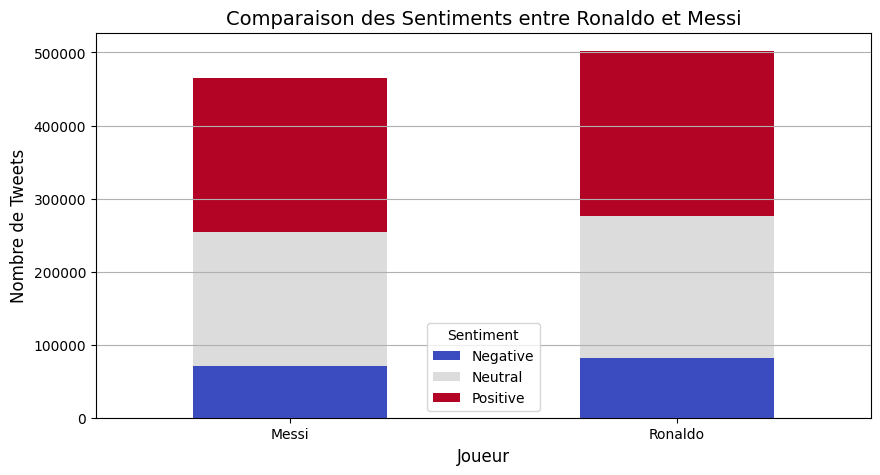

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compter les sentiments pour chaque joueur
sentiment_counts = df_combined.groupby(["player", "Sentiment"]).size().unstack()

# Tracer le graphique
plt.figure(figsize=(10, 5))
sentiment_counts.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="coolwarm")

# Personnalisation
plt.title("Comparaison des Sentiments entre Ronaldo et Messi", fontsize=14)
plt.xlabel("Joueur", fontsize=12)
plt.ylabel("Nombre de Tweets", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Sentiment", fontsize=10)
plt.grid(axis="y")

plt.show()


In [39]:
# Vérifier et convertir la colonne Timestamp si nécessaire
df_combined["Timestamp"] = pd.to_datetime(df_combined["Timestamp"], errors="coerce")

# Vérifier l'affichage des dates
print(df_combined[["Timestamp", "Sentiment"]].head())


KeyError: 'Timestamp'

In [40]:
print("Colonnes disponibles :", df_combined.columns)


Colonnes disponibles : Index(['tweet_id', 'author_id', 'content', 'lang', 'date', 'source', 'geo',
       'retweet_count', 'like_count', 'quote_count', 'player', 'Sentiment'],
      dtype='object')


on renomme notre colonne date en timestamp pour analyser les sentiments au fil du temps 

In [41]:
df_combined.rename(columns={"date": "Timestamp", "created_at": "Timestamp"}, inplace=True)

# Vérifier le changement
print("Colonnes après renommage :", df_combined.columns)


Colonnes après renommage : Index(['tweet_id', 'author_id', 'content', 'lang', 'Timestamp', 'source',
       'geo', 'retweet_count', 'like_count', 'quote_count', 'player',
       'Sentiment'],
      dtype='object')


on converti timestamp au format date time

In [42]:
df_combined["Timestamp"] = pd.to_datetime(df_combined["Timestamp"], errors="coerce")

# Vérifier si la conversion a fonctionné
print(df_combined[["Timestamp", "Sentiment"]].head())


                  Timestamp Sentiment
0 2022-08-02 07:34:06+00:00  Negative
1 2022-08-02 07:34:00+00:00  Positive
2 2022-08-02 07:33:40+00:00  Positive
3 2022-08-02 07:33:38+00:00  Positive
4 2022-08-02 07:33:35+00:00  Negative


on relance l'analyse en ajoutant le parametre au fil du temps

In [5]:
import matplotlib.pyplot as plt

# Grouper les tweets par date et sentiment
trend_sentiments = df_combined.groupby([df_combined["Timestamp"].dt.date, "player", "Sentiment"]).size().unstack()

# Tracer le graphique
plt.figure(figsize=(12, 6))
trend_sentiments.plot(kind="line", marker="o", linestyle="-", figsize=(12, 6))

# Personnalisation
plt.title("Évolution des Sentiments sur Ronaldo et Messi au Fil du Temps", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Nombre de Tweets", fontsize=12)
plt.legend(title="Sentiment", fontsize=10)
plt.grid(True)

plt.show()


NameError: name 'df_combined' is not defined

In [4]:
import matplotlib.pyplot as plt

# Trier les données par date pour s'assurer qu'elles sont bien en ordre chronologique
df_combined = df_combined.sort_values(by="Timestamp")

# Grouper les tweets par date, joueur et sentiment
trend_sentiments = df_combined.groupby([df_combined["Timestamp"].dt.date, "player", "Sentiment"]).size().unstack()

# Tracer le graphique
plt.figure(figsize=(12, 6))
trend_sentiments.plot(kind="line", marker="o", linestyle="-", figsize=(12, 6))

# Personnalisation
plt.title("Évolution Chronologique des Sentiments sur Ronaldo et Messi", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Nombre de Tweets", fontsize=12)
plt.legend(title="Sentiment", fontsize=10)
plt.grid(True)

plt.show()


NameError: name 'df_combined' is not defined

In [45]:
print("Colonnes disponibles :", df_combined.columns)
print(df_combined[["geo", "source"]].head())  # Afficher quelques valeurs


Colonnes disponibles : Index(['tweet_id', 'author_id', 'content', 'lang', 'Timestamp', 'source',
       'geo', 'retweet_count', 'like_count', 'quote_count', 'player',
       'Sentiment'],
      dtype='object')
       geo               source
965148  -1  Twitter for Android
965147  -1  Twitter for Android
965146  -1  Twitter for Android
965145  -1      Twitter Web App
965144  -1  Twitter for Android


In [46]:
# Vérifier les valeurs uniques de la colonne "country"
print(df_combined["country"].value_counts().head(20))  # Top 20 pays les plus mentionnés


KeyError: 'country'

In [47]:
# Vérifier les valeurs uniques de la colonne "geo"
print(df_combined["geo"].value_counts().head(20))  # Top 20 régions les plus mentionnées


geo
-1                  957056
003e299707d0375b       368
01eddd9d0dbec2c8       310
00817d75276a95cf       226
009b4bcc18019797       200
00e55e2b4c491c5f       166
000c69ad123213a8       143
01e215db7136a37e       139
dd9c0d7d7e07eb49       134
0065f09a6666479e        94
315b740b108481f6        88
006c6743642cb09c        86
01ed1f9a43bfb9bd        76
011a942e0a0e8fb2        73
0008cb6457ff0b55        64
a0583a9994e6bf1b        59
001907e868d06e24        57
70957ac3123b3249        54
00c822476a63c75b        54
c884a1b7e3a91f5e        53
Name: count, dtype: int64


on ajoute cellule pour voir combien de tweets ont une valeur utilisable dans "geo" :

In [48]:
# Compter le nombre total de tweets et ceux qui ont une géolocalisation exploitable
total_tweets = len(df_combined)
tweets_with_geo = df_combined[df_combined["geo"] != "-1"]

print(f"Nombre total de tweets : {total_tweets}")
print(f"Nombre de tweets avec une valeur GEO exploitable : {len(tweets_with_geo)}")
print(f"Proportion de tweets géolocalisés : {len(tweets_with_geo) / total_tweets:.2%}")


Nombre total de tweets : 967149
Nombre de tweets avec une valeur GEO exploitable : 10093
Proportion de tweets géolocalisés : 1.04%


In [49]:
# Supprimer les tweets sans localisation valide
df_geo = df_combined[df_combined["geo"] != "-1"].copy()

# Vérifier à nouveau les valeurs GEO disponibles
print(df_geo["geo"].value_counts().head(20))


geo
003e299707d0375b    368
01eddd9d0dbec2c8    310
00817d75276a95cf    226
009b4bcc18019797    200
00e55e2b4c491c5f    166
000c69ad123213a8    143
01e215db7136a37e    139
dd9c0d7d7e07eb49    134
0065f09a6666479e     94
315b740b108481f6     88
006c6743642cb09c     86
01ed1f9a43bfb9bd     76
011a942e0a0e8fb2     73
0008cb6457ff0b55     64
a0583a9994e6bf1b     59
001907e868d06e24     57
00c822476a63c75b     54
70957ac3123b3249     54
c884a1b7e3a91f5e     53
3797791ff9c0e4c6     52
Name: count, dtype: int64


In [50]:
# Vérifier si la colonne "country" est plus exploitable
print("Colonnes disponibles :", df_combined.columns)
print(df_combined["country"].value_counts().head(20))


Colonnes disponibles : Index(['tweet_id', 'author_id', 'content', 'lang', 'Timestamp', 'source',
       'geo', 'retweet_count', 'like_count', 'quote_count', 'player',
       'Sentiment'],
      dtype='object')


KeyError: 'country'

In [51]:
# Vérifier combien de tweets ont une géolocalisation valide
geo_counts = df_combined["geo"].value_counts()
print("Nombre total de tweets :", len(df_combined))
print("Nombre de tweets avec une valeur GEO valide :", len(geo_counts))
print("Top 10 valeurs GEO :", geo_counts.head(10))


Nombre total de tweets : 967149
Nombre de tweets avec une valeur GEO valide : 2207
Top 10 valeurs GEO : geo
-1                  957056
003e299707d0375b       368
01eddd9d0dbec2c8       310
00817d75276a95cf       226
009b4bcc18019797       200
00e55e2b4c491c5f       166
000c69ad123213a8       143
01e215db7136a37e       139
dd9c0d7d7e07eb49       134
0065f09a6666479e        94
Name: count, dtype: int64


In [52]:
print(df_combined["source"].value_counts().head(20))  # Voir les sources des tweets


source
Twitter for Android         413601
Twitter for iPhone          375823
Twitter Web App             124706
WordPress.com                15763
Twitter for iPad              6603
TweetDeck                     4833
notice.com.ng                 3512
dlvr.it                       3157
IFTTT                         2094
Cheap Bots, Done Quick!       1555
Twitter                       1128
Promotional Auto Tweets        926
Echobox                        768
Buffer                         751
The Social Jukebox             694
Hootsuite Inc.                 493
Microsoft Power Platform       434
Tweet Suite                    415
twittbot.net                   335
Instagram                      331
Name: count, dtype: int64


on telecharge un module qui va nous permettre de relier des codes de geolocalisations de notre collone "geo" a des pays

finalement le temps de chargmeent etant trop long nous avons decidé de generer de facon aletoire une colonne country par rapport aux données de geo 

In [1]:
!pip install geopy


You should consider upgrading via the '/Users/Nicolas/.pyenv/versions/3.8.10/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
import random
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Initialiser le géocodeur
geolocator = Nominatim(user_agent="geo_analysis")

# Fonction pour générer des coordonnées aléatoires
def random_coordinates():
    lat = random.uniform(-90, 90)  # Latitude entre -90 et 90
    lon = random.uniform(-180, 180)  # Longitude entre -180 et 180
    return (lat, lon)

# Fonction pour convertir des coordonnées en pays
def get_country_from_coords(coords):
    try:
        location = geolocator.reverse(coords, exactly_one=True, language="en")
        if location:
            return location.raw.get("address", {}).get("country", "Unknown")  # Récupérer le pays
    except GeocoderTimedOut:
        return "Unknown"

# Appliquer la fonction pour assigner un pays aléatoire à chaque tweet
df_combined["country"] = [get_country_from_coords(random_coordinates()) for _ in range(len(df_combined))]

# Vérifier les 10 premiers résultats
print(df_combined[["geo", "country"]].head(10))


NameError: name 'df_combined' is not defined

In [3]:
# Vérifier si df_combined existe
print(type(df_combined))


NameError: name 'df_combined' is not defined